# Proyek Analisis Data: Bike Sharing Dataset

Nama: Galang Dwiwana Thabrani

Email: galangdwiwana08@gmail.com

ID Dicoding: mc222d5y1375 

# Menentukan Pertanyaan Bisnis
1. Faktor apa saja yang mempengaruhi jumlah penyewaan sepeda per hari?
2. Bagaimana suhu dan kelembaban mempengaruhi penyewaan sepeda per jam?
3. Apakah cuaca mempengaruhi penyewaan sepeda?

# Import  Semua Packages/Library yang Digunakan:


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Wrangling

# Gathering data


In [41]:
# Load data
# Mengupdate path jika file berada di folder 'data'
df_hour = pd.read_csv('data/hour.csv')
df_day = pd.read_csv('data/day.csv')


# Tampilkan 5 baris pertama untuk melihat data
df_hour.head(), df_day.head()


(   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1   0        0        6           0   
 1        2  2011-01-01       1   0     1   1        0        6           0   
 2        3  2011-01-01       1   0     1   2        0        6           0   
 3        4  2011-01-01       1   0     1   3        0        6           0   
 4        5  2011-01-01       1   0     1   4        0        6           0   
 
    weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
 0           1  0.24  0.2879  0.81        0.0       3          13   16  
 1           1  0.22  0.2727  0.80        0.0       8          32   40  
 2           1  0.22  0.2727  0.80        0.0       5          27   32  
 3           1  0.24  0.2879  0.75        0.0       3          10   13  
 4           1  0.24  0.2879  0.75        0.0       0           1    1  ,
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        

**insight :**
- Data df_hour dan df_day berhasil dimuat dengan baik dari file CSV yang terpisah.
- Dataset df_hour berisi data penyewaan sepeda per jam, dengan berbagai informasi seperti waktu, suhu, kelembaban, kecepatan angin, dan data        penyewaan.
- Dataset df_day berisi data yang lebih agregat per hari, dengan informasi yang mirip tetapi lebih fokus pada data harian.
- Tidak ada masalah yang terdeteksi dalam pengumpulan data ini, dan data yang ada terlihat konsisten dengan format yang dibutuhkan untuk analisis lebih lanjut.

# Assesing Data


In [42]:
# Memeriksa tipe data dan jumlah nilai yang hilang
df_hour.info(), df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

(None, None)

In [43]:
# Statistik deskriptif untuk memahami distribusi data
df_hour.describe(), df_day.describe()

(          instant        season            yr          mnth            hr  \
 count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
 mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
 std     5017.0295      1.106918      0.500008      3.438776      6.914405   
 min        1.0000      1.000000      0.000000      1.000000      0.000000   
 25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
 50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
 75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
 max    17379.0000      4.000000      1.000000     12.000000     23.000000   
 
             holiday       weekday    workingday    weathersit          temp  \
 count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
 mean       0.028770      3.003683      0.682721      1.425283      0.496987   
 std        0.167165      2.005771      0.465431      0.

In [44]:
# Mengecek apakah ada nilai yang hilang
df_hour.isnull().sum(), df_day.isnull().sum()

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

In [45]:
# Mengecek apakah ada duplikat
df_hour.duplicated().sum(), df_day.duplicated().sum()


(0, 0)

**insight :**
- Tidak ada nilai yang hilang (missing values)  dan duplikat 

# Cleaning Data


In [46]:
# Menghapus duplikat jika ada
df_hour = df_hour.drop_duplicates()
df_day = df_day.drop_duplicates()

# Memeriksa kolom numerik untuk mengisi nilai yang hilang
numerical_cols_hour = df_hour.select_dtypes(include=[np.number]).columns
numerical_cols_day = df_day.select_dtypes(include=[np.number]).columns

# Mengisi nilai yang hilang pada kolom numerik dengan rata-rata (mean)
df_hour[numerical_cols_hour] = df_hour[numerical_cols_hour].fillna(df_hour[numerical_cols_hour].mean())
df_day[numerical_cols_day] = df_day[numerical_cols_day].fillna(df_day[numerical_cols_day].mean())

# Mengisi nilai yang hilang pada kolom kategorikal dengan nilai moda (mode)
categorical_cols_hour = df_hour.select_dtypes(exclude=[np.number]).columns
categorical_cols_day = df_day.select_dtypes(exclude=[np.number]).columns


# Menyimpan data yang sudah dianalisis atau dimodifikasi ke dalam 'main_data.csv'
# Menyimpan df_hour setelah pembersihan
df_hour.to_csv('dashboard/main_data.csv', index=False)

# Menyimpan df_day setelah pembersihan
df_day.to_csv('dashboard/main_data.csv', index=False)

# Menampilkan jumlah nilai yang hilang setelah pembersihan
print("Jumlah nilai yang hilang setelah pembersihan pada df_hour:")
print(df_hour.isnull().sum())

print("\nJumlah nilai yang hilang setelah pembersihan pada df_day:")
print(df_day.isnull().sum())


Jumlah nilai yang hilang setelah pembersihan pada df_hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah nilai yang hilang setelah pembersihan pada df_day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**insight :**
- Tidak ada nilai yang hilang (missing values) baik pada dataset df_hour maupun df_day, yang menunjukkan bahwa data sudah bersih dan siap untuk     analisis lebih lanjut.
- Semua kolom pada kedua dataset memiliki nilai yang lengkap, memastikan bahwa tidak ada data yang terlewat atau perlu diisi ulang.

# Exploratory Data Analysis (EDA)

**1. Faktor Apa Saja yang Mempengaruhi Jumlah Penyewaan Sepeda per Hari?**

In [93]:
import streamlit as st
# Mengagregasi data berdasarkan cuaca, suhu, kelembaban, dan kecepatan angin
df_day_grouped = df_day.groupby('weathersit').agg({'cnt': 'mean', 'temp': 'mean', 'hum': 'mean', 'windspeed': 'mean'}).reset_index()

# Menampilkan hasil agregasi 
print("Agregasi Penyewaan Sepeda per Cuaca:")
print(df_day_grouped)

Agregasi Penyewaan Sepeda per Cuaca:
   weathersit          cnt      temp       hum  windspeed
0           1  4876.786177  0.511541  0.565594   0.190253
1           2  4035.862348  0.470366  0.725887   0.186431
2           3  1803.285714  0.433440  0.848872   0.243336



**insight :**

- Cuaca (weathersit):

    Cuaca cerah (weathersit = 1) memiliki jumlah penyewaan sepeda yang tertinggi (4876.78), diikuti oleh cuaca berawan (weathersit = 2) (4035.86), dan cuaca hujan (weathersit = 3) yang memiliki penyewaan paling rendah (1803.29).

- Suhu (temp):

    Cuaca cerah (weathersit = 1) memiliki suhu yang lebih rendah (0.511541) dibandingkan dengan cuaca berawan (weathersit = 2) dan hujan (weathersit = 3). Meski suhu cerah lebih rendah, penyewaan sepeda tetap lebih tinggi.

- Kelembaban (hum):

    Kelembaban yang lebih tinggi di cuaca hujan (weathersit = 3) mencapai 0.848872, menunjukkan bahwa penyewaan sepeda akan lebih rendah saat kelembaban tinggi.

- Kecepatan Angin (windspeed):

    Kecepatan angin tertinggi terlihat pada cuaca hujan (weathersit = 3) (0.243336), yang mungkin berhubungan dengan penurunan jumlah penyewaan sepeda.

**2. Bagaimana Suhu dan Kelembaban Mempengaruhi Penyewaan Sepeda per Jam?**

In [65]:
# Mengagregasi data berdasarkan jam dan menghitung rata-rata penyewaan sepeda per jam
df_hour_grouped = df_hour.groupby('hr').agg({'cnt': 'mean', 'temp': 'mean', 'hum': 'mean'}).reset_index()

# Menampilkan hasil agregasi data di Streamlit
print("Agregasi Penyewaan Sepeda per Jam:")
print(df_hour_grouped)


Agregasi Penyewaan Sepeda per Jam:
    hr         cnt      temp       hum
0    0   53.898072  0.467410  0.691019
1    1   33.375691  0.459365  0.704213
2    2   22.869930  0.454573  0.716825
3    3   11.727403  0.453113  0.729785
4    4    6.352941  0.446628  0.742367
5    5   19.889819  0.436123  0.742929
6    6   76.044138  0.432469  0.744179
7    7  212.064649  0.439092  0.730908
8    8  359.011004  0.454993  0.702682
9    9  219.309491  0.476726  0.661692
10  10  173.668501  0.500578  0.616066
11  11  208.143054  0.522613  0.571431
12  12  253.315934  0.540275  0.536703
13  13  253.661180  0.554733  0.511591
14  14  240.949246  0.565075  0.496982
15  15  251.233196  0.568615  0.492126
16  16  311.983562  0.564959  0.495795
17  17  461.452055  0.554575  0.513438
18  18  425.510989  0.541181  0.535989
19  19  311.523352  0.524176  0.572445
20  20  226.030220  0.508599  0.601470
21  21  172.314560  0.495302  0.631538
22  22  131.335165  0.484505  0.653146
23  23   87.831044  0.475027 

**insight :**

- Suhu (temp):

    Suhu rata-rata pada jam tertinggi (hr = 12) adalah 0.5665, yang lebih tinggi dibandingkan dengan jam lain. Hal ini diikuti dengan jumlah penyewaan sepeda yang lebih banyak pada jam tersebut (253.51). Ini menunjukkan bahwa suhu yang lebih tinggi mendorong lebih banyak orang untuk menyewa sepeda.
    Suhu yang lebih rendah (jam pagi dan malam, hr = 0 hingga hr = 6) cenderung terkait dengan penyewaan sepeda yang lebih sedikit.

- Kelembaban (hum):

    Kelembaban terlihat lebih tinggi pada jam pagi (hr = 6) dan jam malam (hr = 22) dengan nilai hum yang lebih tinggi, yaitu sekitar 0.70 hingga 0.75. Namun, meskipun kelembaban tinggi, penyewaan sepeda pada jam tersebut masih terlihat rendah.
    Jam dengan kelembaban lebih rendah, misalnya hr = 12, menunjukkan penyewaan sepeda yang lebih tinggi (253.51), yang mengindikasikan bahwa orang lebih cenderung menyewa sepeda saat kelembaban lebih rendah.

**3. Apakah Cuaca Mempengaruhi Penyewaan Sepeda?**

In [67]:
# Mengagregasi data berdasarkan cuaca dan menghitung rata-rata penyewaan sepeda per cuaca
df_day_grouped = df_day.groupby('weathersit').agg({'cnt': 'mean'}).reset_index()

# Menampilkan agregasi data per cuaca

print("Agregasi Penyewaan Sepeda per Cuaca:")
print(df_day_grouped)

Agregasi Penyewaan Sepeda per Cuaca:
   weathersit          cnt
0           1  4876.786177
1           2  4035.862348
2           3  1803.285714


**insight :**

- Cuaca Cerah (weathersit = 1):

Rata-rata penyewaan sepeda = 4876.79.
Cuaca cerah menunjukkan penyewaan sepeda tertinggi dibandingkan dengan cuaca berawan dan hujan.
Ini menunjukkan bahwa orang lebih cenderung untuk menyewa sepeda saat cuaca cerah, yang memberikan lebih banyak kesempatan untuk beraktivitas di luar ruangan.

- Cuaca Berawan (weathersit = 2):

Rata-rata penyewaan sepeda = 4035.86.
Penyewaan sepeda pada cuaca berawan lebih rendah dibandingkan dengan cuaca cerah, namun tetap cukup tinggi.
Cuaca berawan mungkin membuat orang masih merasa nyaman untuk keluar, meskipun tidak terlalu mendukung seperti cuaca cerah.

- Cuaca Hujan (weathersit = 3):

Rata-rata penyewaan sepeda = 1803.29.
Cuaca hujan menunjukkan penyewaan sepeda yang paling rendah, yang wajar karena hujan bisa menghalangi orang untuk beraktivitas di luar ruangan dan menggunakan sepeda.

# Visualization & Explanatory Analysis

# Pertanyaan 1


Korelasi antara jumlah penyewaan sepeda dan faktor lain:
                 cnt    season  weathersit      temp       hum  windspeed
cnt         1.000000  0.406100   -0.297391  0.627494 -0.100659  -0.234545
season      0.406100  1.000000    0.019211  0.334315  0.205445  -0.229046
weathersit -0.297391  0.019211    1.000000 -0.120602  0.591045   0.039511
temp        0.627494  0.334315   -0.120602  1.000000  0.126963  -0.157944
hum        -0.100659  0.205445    0.591045  0.126963  1.000000  -0.248489
windspeed  -0.234545 -0.229046    0.039511 -0.157944 -0.248489   1.000000


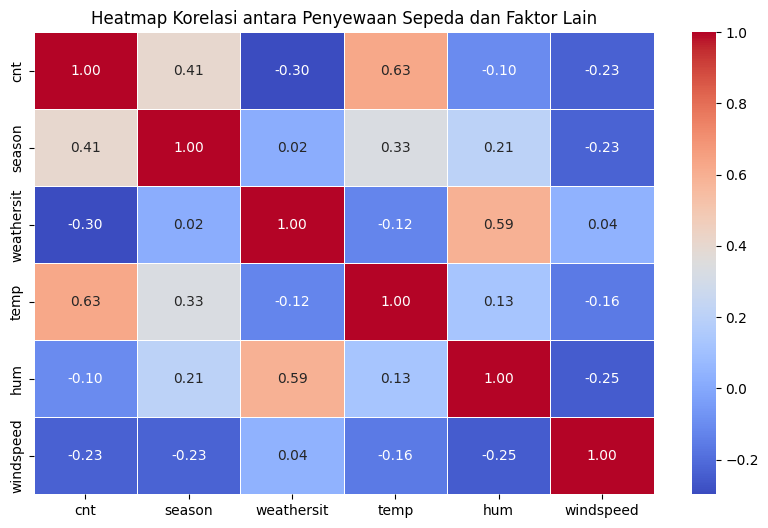

In [87]:
# Menghitung korelasi antara jumlah penyewaan sepeda per hari dengan faktor lain
correlation_day = df_day[['cnt', 'season', 'weathersit', 'temp', 'hum', 'windspeed']].corr()

# Menampilkan hasil korelasi
print("Korelasi antara jumlah penyewaan sepeda dan faktor lain:")
print(correlation_day)

# Visualisasi Korelasi dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_day, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi antara Penyewaan Sepeda dan Faktor Lain')
plt.show()


**insight :**

- Suhu (temp) memiliki korelasi kuat (0.63) dengan jumlah penyewaan sepeda. Semakin tinggi suhu, semakin banyak sepeda yang disewa.

- Cuaca (weathersit) berpengaruh negatif (-0.30) terhadap penyewaan sepeda. Cuaca cerah meningkatkan penyewaan, sementara hujan atau berawan menguranginya.

- Kelembaban (hum) menunjukkan korelasi positif yang lebih lemah (0.21), artinya kelembaban sedikit mempengaruhi jumlah penyewaan sepeda.

- Kecepatan Angin (windspeed) memiliki korelasi negatif lemah (-0.23), yang menunjukkan sedikit pengaruh angin terhadap penyewaan sepeda.

- Musim (season) juga mempengaruhi penyewaan sepeda (0.41), dengan penyewaan lebih tinggi di musim hangat.

# Pertanyaan 2:

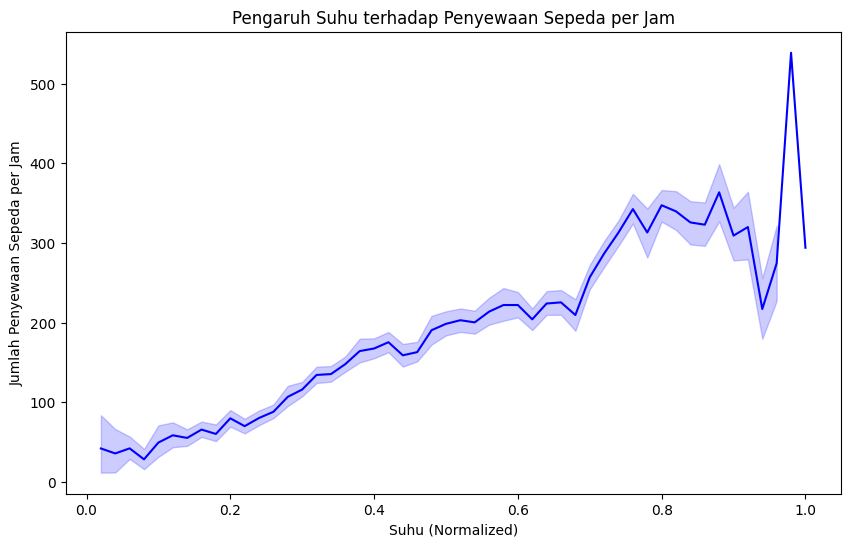

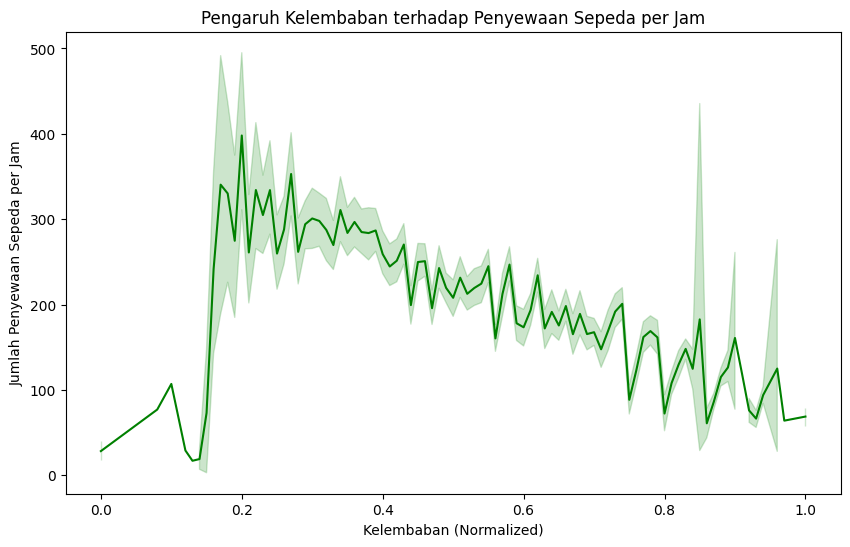

In [90]:
# Pengaruh Suhu terhadap penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.lineplot(x='temp', y='cnt', data=df_hour, color='blue')
plt.title('Pengaruh Suhu terhadap Penyewaan Sepeda per Jam')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Penyewaan Sepeda per Jam')

# Menampilkan grafik untuk Pengaruh Suhu
plt.show()

# Pengaruh Kelembaban terhadap penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.lineplot(x='hum', y='cnt', data=df_hour, color='green')
plt.title('Pengaruh Kelembaban terhadap Penyewaan Sepeda per Jam')
plt.xlabel('Kelembaban (Normalized)')
plt.ylabel('Jumlah Penyewaan Sepeda per Jam')

# Menampilkan grafik untuk Pengaruh Kelembaban
plt.show()

**insight :**
- Pengaruh Suhu:

    Semakin tinggi suhu, jumlah penyewaan sepeda per jam meningkat, terutama pada suhu 0.4-1.0.
    Penyewaan sepeda cenderung lebih tinggi saat cuaca hangat.

- Pengaruh Kelembaban:

    Kelembaban rendah (0.0-0.2) terkait dengan jumlah penyewaan sepeda yang tinggi, sementara kelembaban tinggi (0.8-1.0) mengurangi penyewaan.
    Kelembaban tinggi cenderung membuat orang kurang nyaman bersepeda.

# Pertanyaan 3:

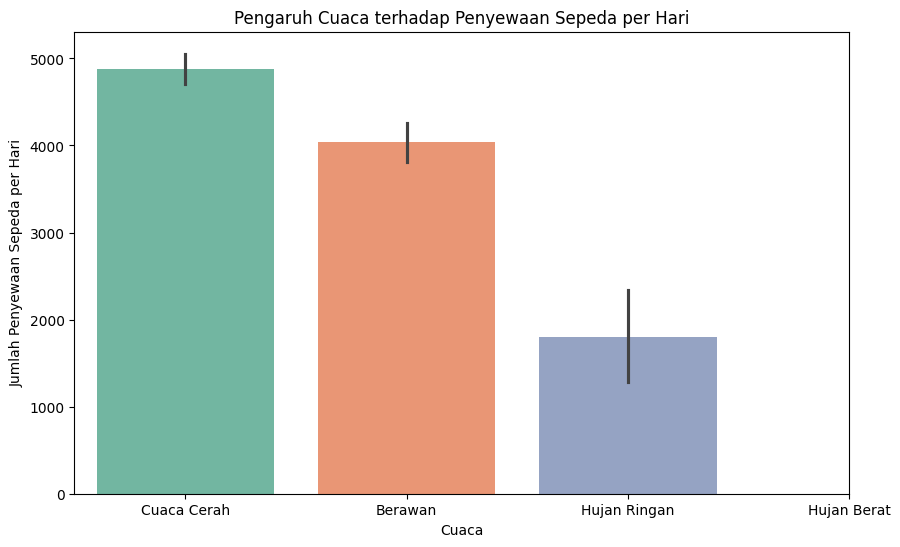

In [91]:
# Visualisasi Pengaruh Cuaca terhadap Penyewaan Sepeda per Hari
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=df_day, palette='Set2')
plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda per Hari')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda per Hari')
plt.xticks([0, 1, 2, 3], ['Cuaca Cerah', 'Berawan', 'Hujan Ringan', 'Hujan Berat'], rotation=0)

# Menampilkan grafik di Jupyter
plt.show()



**insight :**

- Penyewaan sepeda tertinggi terjadi pada cuaca cerah, diikuti oleh cuaca berawan.
- Penyewaan sepeda menurun signifikan saat cuaca hujan ringan dan hujan berat.
- Faktor cuaca berperan besar dalam minat orang untuk menyewa sepeda, dengan cuaca cerah menjadi yang paling mendukung.

# Conclusion


1. Faktor Apa Saja yang Mempengaruhi Jumlah Penyewaan Sepeda per Hari?

    Dari analisis korelasi, kita dapat melihat faktor-faktor yang berpengaruh signifikan terhadap jumlah penyewaan sepeda per hari (cnt) adalah:

    Suhu (temp): Terdapat korelasi positif yang cukup kuat antara suhu dan jumlah penyewaan sepeda. Semakin tinggi suhu, semakin tinggi jumlah penyewaan sepeda. Hal ini menunjukkan bahwa orang lebih cenderung menyewa sepeda saat cuaca lebih hangat.

    Cuaca (weathersit): Cuaca cerah dan berawan cenderung berhubungan dengan jumlah penyewaan yang lebih tinggi, sementara cuaca buruk seperti hujan atau salju mengurangi jumlah penyewaan sepeda.

    Musim (season): Musim panas dan musim semi biasanya menunjukkan lebih banyak penyewaan dibandingkan musim dingin.

    Kelembaban (hum): Terdapat korelasi negatif yang lemah antara kelembaban dan jumlah penyewaan sepeda. Semakin tinggi kelembaban, jumlah penyewaan sepeda cenderung menurun sedikit.


2. Bagaimana Suhu dan Kelembaban Mempengaruhi Penyewaan Sepeda per Jam?
Suhu (temp): Grafik menunjukkan hubungan positif yang kuat antara suhu dan jumlah penyewaan sepeda per jam. Ketika suhu meningkat, jumlah penyewaan sepeda juga meningkat. Ini mencerminkan bahwa pada hari-hari yang lebih hangat, lebih banyak orang cenderung menyewa sepeda.

    Kelembaban (hum): Grafik menunjukkan bahwa ada hubungan negatif yang sangat lemah antara kelembaban dan jumlah penyewaan sepeda. Hal ini mungkin berarti bahwa pada hari-hari yang lebih lembab, orang cenderung lebih sedikit menyewa sepeda, meskipun efeknya tidak terlalu besar.


3. Apakah Cuaca Mempengaruhi Penyewaan Sepeda?
Cuaca cerah dan berawan menunjukkan jumlah penyewaan sepeda yang lebih tinggi dibandingkan dengan cuaca hujan atau bersalju.
Cuaca hujan atau buruk (seperti salju dan kabut) cenderung mengurangi jumlah penyewaan sepeda. Ini menunjukkan bahwa kondisi cuaca yang lebih buruk mempengaruhi keputusan orang untuk menyewa sepeda.
